In [4]:
%matplotlib inline
# ^^ ensures plots are displayed in the notebook
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import sys
from itertools import repeat

In [5]:
def display(grid):
    cmap = plt.cm.colors.ListedColormap(['white', 'red', 'blue'])
    plt.imshow(grid, cmap=cmap, interpolation='nearest')
    # offset grid lines by half
    plt.xticks(np.arange(-0.5, len(grid[0]), 1), [])
    plt.yticks(np.arange(-0.5, len(grid), 1), [])
    # show grid lines
    plt.grid(True, which='both', color='black', linestyle='-', linewidth=1)
    plt.show()

# this function displays the colours wrong when only player 1 has moved. it displays 0 as white and 1 as red.
# any other time it works as expected.
# i'm guessing this is because of how ListedColormap works
# i'm just gonna say this is fine because this function doesn't *really* matter, and any other solution I can find
# seems way more complicated

In [6]:
grid = np.array([
    [0, 1, 2, 1, 0],
    [2, 0, 1, 2, 1],
    [1, 2, 0, 1, 2],
    [2, 1, 0, 2, 1],
    [0, 2, 1, 0, 2]
])

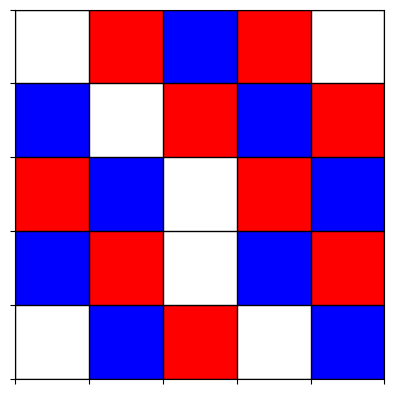

In [7]:
display(grid)

In [8]:
def potential_pos_lists(pos):
    x, y = pos
    def filter(iterable):
        return in_range(7, 6, iterable)
        
    row = filter(zip(range(x-3, x+4), repeat(y)))
    col = filter(zip(repeat(x), range(y-3, y+4)))
    diag1 = filter(zip(range(x-3, x+4), range(y-3, y+4)))
    diag2 = filter(zip(range(x-3, x+4), range(y+3, y-4, -1)))

    return [ s for s in [row, col, diag1, diag2] if len(s) >= 4 ]

In [9]:
potential_val_lists(Connect4(), (0, 0))

NameError: name 'potential_val_lists' is not defined

In [10]:
def potential_val_lists(game, pos):
    return list(map(
        lambda lst: list(map(
            lambda pos: game.state[pos[1]][pos[0]],
            lst)),
        potential_pos_lists(pos)))

In [11]:
def has_win(line, player):
    count = 0
    for val in cell_vals:
        if val == player:
            count += 1
            if count == 4:
                return True
        else:
            count = 0
    return False

In [12]:
def in_range(xthresh, ythresh, tuples):
    return [ (x, y) for (x, y) in tuples if x >= 0 and x < xthresh and y >= 0 and y < ythresh ]

In [13]:
def has_run(cell_vals, player):
    count = 0
    for val in cell_vals:
        if val == player:
            count += 1
        else:
            count = 0
        if count == 4:
            return True
    return False

In [14]:
# def invert_1_2(x):
#     return x ^ 3
    
#vinvert_1_2 = np.vectorize(invert_1_2)

def empty_board():
    return np.zeros((6, 7), dtype=np.int32)

class Connect4:
    def __init__(self, state=None):
        self.state = empty_board() if state is None else state
        self.player = 1
        self.winner = None # None -> game in progress. winner == None && player == None -> draw. maybe change this so -1 -> draw.

    def __repr__(self):
        return f'Connect4 game:\n{self.state}\n' + (
            f'player: {self.player}' if self.player else
            f'winner: {self.winner}' if self.winner else
            'Draw'
        )

    @property
    def opponent(self):
        return self.player ^ 3
    
    def update_player(self):
        self.player = self.opponent

    def play(self, col):
        #print((self, self._open_indices, col))
        def try_play(row):
            if row == -1:
                return None # False
            elif self.state[row][col] == 0:
                self.state[row][col] = self.player
                # check for win here
                # check if we have a run of 4 adjacent (in state range and same value as self.player) values
                self._update_winner(col, row)
                if (self.player):
                    self.update_player()
                return self # True
            else:
                return try_play(row - 1)

        return try_play(self.last_row())

    # def invert(self):
    #     self.state = vinvert_1_2(self.state)

    def last_row(self):
        return self.state.shape[0] - 1

    def _update_winner(self, x, y):
        if True in map(
            lambda line: has_run(line, self.player),
            potential_val_lists(self, (x, y))):
            self.winner = self.player
            self.player = None
        if self._open_indices == []:
            self.player = None # Draw
    
    def random_finish(self):
        while self.player:
            move = random.randint(0, len(self._open_indices)-1)
            self.play(self._open_indices[move])

    @property
    def _open_indices(self):
        return [j for i, j in zip(self.state[0], range(len(self.state[0]))) if i == 0]

    def copy(self):
        tmp = Connect4(state=self.state.copy())
        tmp.player = self.player
        return tmp        

In [15]:
g = Connect4()
g.random_finish()
while not (g.player == None and g.winner == None):
    g = Connect4()
    g.random_finish()
g

Connect4 game:
[[1 2 2 2 1 2 2]
 [1 2 1 1 2 2 1]
 [2 1 1 2 1 1 2]
 [2 2 1 1 1 2 2]
 [1 1 2 2 2 1 1]
 [1 2 2 1 1 2 1]]
Draw

In [16]:
g = Connect4()
g.play(0)
g

Connect4 game:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]
player: 2

In [17]:
in_range(7, 6, zip(range(-2, 15), range(-1, 10)))

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]

In [18]:
lines_to_check((3, 4))

NameError: name 'lines_to_check' is not defined

In [19]:
list(map(lambda lst: list(map(lambda x: x + 1, lst)), [[1, 2, 3], [4, 5, 6], [7, 8, 9]]))

[[2, 3, 4], [5, 6, 7], [8, 9, 10]]

In [20]:
list(map(lambda lst: list(map(lambda pos: game.state[pos[1]][pos[0]], lst)), lines_to_check((3, 4))))

NameError: name 'lines_to_check' is not defined

In [21]:
list(map(lambda lst: list(map(lambda pos: game.state[pos[1]][pos[0]], lst)), lines_to_check((2, 3))))

NameError: name 'lines_to_check' is not defined

In [146]:
def winning_move(game, player, pos):
    potential_lines = list(map(lambda lst: list(map(lambda pos: game.state[pos[1]][pos[0]], lst)), lines_to_check(pos)))
    return True in map(
        lambda line: has_run(line, player),
        potential_lines)

In [147]:
winning_move(game, 1, (2, 3))

NameError: name 'game' is not defined

In [148]:
5 in range(10)

True

In [149]:
[ i for i in zip(range(-5, 10), range(4, 8)) ]

[(-5, 4), (-4, 5), (-3, 6), (-2, 7)]

In [150]:
game = Connect4()
game.play(0)
game.play(1)
game.play(1)
game.play(3)
game.play(3)
game.play(3)
game.play(3)
game.play(2)
game.play(2)
game.play(5)
game.play(2)
print(game)
#game.play(3)

Connect4 game:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 2 0 0 0]
 [0 1 1 1 0 0 0]
 [1 2 2 2 0 2 0]]
winner: 1


In [151]:
game = Connect4()
game.state

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)

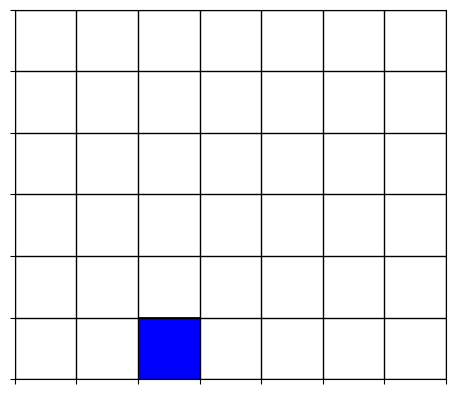

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]]
[0, 1, 2, 3, 4, 5, 6]


In [152]:
game.play(2)
display(game.state)
print(game.state)
print(game._open_indices)

In [153]:
a = [1, 2, 0, 2, 0, 1]
len([1 for n in a if n == 0])

2

In [22]:
br = '\n'
comma = ','
root2 = math.sqrt(2)

class MCTSnode():
    def __init__(self, game, player=None, move=None):
        self.total = 0
        self.visits = 0
        self.C = root2
        self.game = game
        self.player = player if player else game.opponent
        self.move = move
        self.children = None

    def __repr__(self):
        return f'\n{str(self.game.state).replace(br, comma)}, {self.player=}, {self.move=}, {self.total=}, {self.visits=} {self.children=}'

    def _print_direct_children(self):
        for child in self.children:
            print((child.game.state, child.total, child.visits))

    def UCB1(self, parent_visits):
        if self.visits == 0:
            return sys.float_info.max
        else:
            return (self.total / self.visits) + self.C * math.sqrt(math.log(parent_visits) / self.visits)

    # Score function for given game
    def score(self, game):
        assert game.player == None, "Cannot score incomplete game."
        if game.winner == self.player:
            return 1
        elif game.winner == None: # draw
            return 0
        else:
            return -1

    def simulate(self):
        simulation = self.game.copy()
        if simulation.winner == None:
            simulation.random_finish()
        return self.score(simulation)
        # maybe "random finish" should be in an MCTS subclass or in a wrapper
        # class on the game class ?
        # if we assume it should be in a wrapper class on game class,
        # nothing actually has to change from the perspective of MCTSnode...

    def rollout(self):
        score = self.simulate()
        self.total += score
        self.visits += 1
        return score
        # "rollout" of a terminal node just returns the winner.

    @property
    def opponent(self):
        return self.player ^ 3 # is it a problem that we have an identical function
        # here and in the game class?

    def add_children(self):
        assert self.game._open_indices
        assert self.game.winner == None
        
        self.children = [
            MCTSnode(self.game.copy().play(move), player=self.opponent, move=move) for move in self.game._open_indices
        ]

    def iterate_best_child(self):
        UCBs = [ (child.UCB1(self.visits), i) for (i, child) in list(enumerate(self.children)) ]
        (max_ucb, i) = max(UCBs)
        score = -self.children[i].iteration() # negative score because we're scoring opponent's move
        self.total += score
        self.visits += 1
        return score

    def iteration(self):
        if self.game.player is None:
            score = self.score(self.game)
            self.total += score
            self.visits += 1
            return score
            
        if self.visits == 0 or self.children == []: # unvisited OR guaranteed losing node -- no children
            return self.rollout()
        if self.children is None:
            self.add_children()
            return self.iteration() # can't call iterate_best_child() directly since we don't know if add_children added anything
        else: # have children
            return self.iterate_best_child()

    def iterate(self, n=1):
        for i in range(n):
            self.iteration()
        return self

    def best_move(self):
        if self.children == None:
            return None

        best_child = self.children[0]
        best_UCB1 = best_child.UCB1(self.visits)
        for child in self.children[1:]:
            child_score = child.UCB1(self.visits)
            if child_score > best_UCB1:
                best_child = child
                best_UCB1 = child_score
    
        # for i in range(3):
        #     for j in range(3):
        #         if self.game.state[i][j] == 0 and best_child.game.state[i][j] == self.player:
        #             return (j, i) # if we store move this could be self.move

        if best_child.move is not None:
            return best_child.move
        
        print("ERROR")
        print(self.game)
        print(self.game._open_indices)
        assert False, "Didn't find any move in best_move"




In [155]:
#Connect4()

In [23]:
m = MCTSnode(Connect4())
m.iterate(1000)


[[0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0]], self.player=2, self.move=None, self.total=-178, self.visits=1000 self.children=[
[[0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [1 0 0 0 0 0 0]], self.player=1, self.move=0, self.total=1, self.visits=69 self.children=[
[[0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [2 0 0 0 0 0 0], [1 0 0 0 0 0 0]], self.player=2, self.move=0, self.total=-2, self.visits=6 self.children=[
[[0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [1 0 0 0 0 0 0], [2 0 0 0 0 0 0], [1 0 0 0 0 0 0]], self.player=1, self.move=0, self.total=0, self.visits=0 self.children=None, 
[[0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [2 0 0 0 0 0 0], [1 1 0 0 0 0 0]], self.player=1, self.move=1, self.total=0, self.visits=0 self.children=None, 
[[0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [2 0 0 0 0 0 0], [1 0 1 0 0 0

In [24]:
m._print_direct_children()

(array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0]], dtype=int32), 1, 69)
(array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0]], dtype=int32), 1, 71)
(array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0]], dtype=int32), 1, 71)
(array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=int32), 148, 498)
(array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0]], dty

In [93]:
m2 = MCTSnode(Connect4().play(3))
m2.iterate(10000)


[[0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 1 0 0 0]], self.player=1, self.move=None, self.total=2315, self.visits=10000 self.children=[
[[0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [2 0 0 1 0 0 0]], self.player=2, self.move=0, self.total=-132, self.visits=351 self.children=[
[[0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [1 0 0 0 0 0 0], [2 0 0 1 0 0 0]], self.player=1, self.move=0, self.total=45, self.visits=98 self.children=[
[[0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [2 0 0 0 0 0 0], [1 0 0 0 0 0 0], [2 0 0 1 0 0 0]], self.player=2, self.move=0, self.total=-7, self.visits=11 self.children=[
[[0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [1 0 0 0 0 0 0], [2 0 0 0 0 0 0], [1 0 0 0 0 0 0], [2 0 0 1 0 0 0]], self.player=1, self.move=0, self.total=1, self.visits=1 self.children=None, 
[[0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [2 0 0 0 0 0 0], [1 0 0 0 0 0 0], [2 1 0 1 

In [94]:
m2._print_direct_children()

(array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 1, 0, 0, 0]], dtype=int32), -132, 351)
(array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 1, 0, 0, 0]], dtype=int32), -193, 593)
(array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 1, 0, 0, 0]], dtype=int32), -339, 1252)
(array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=int32), -1126, 6209)
(array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1

In [103]:
m3 = MCTSnode(Connect4().play(3).play(6))
m3.iterate(10000)


[[0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 1 0 0 2]], self.player=2, self.move=None, self.total=-3628, self.visits=10000 self.children=[
[[0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [1 0 0 1 0 0 2]], self.player=1, self.move=0, self.total=255, self.visits=809 self.children=[
[[0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [2 0 0 0 0 0 0], [1 0 0 1 0 0 2]], self.player=2, self.move=0, self.total=-28, self.visits=53 self.children=[
[[0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [1 0 0 0 0 0 0], [2 0 0 0 0 0 0], [1 0 0 1 0 0 2]], self.player=1, self.move=0, self.total=6, self.visits=9 self.children=[
[[0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [2 0 0 0 0 0 0], [1 0 0 0 0 0 0], [2 0 0 0 0 0 0], [1 0 0 1 0 0 2]], self.player=2, self.move=0, self.total=1, self.visits=2 self.children=[
[[0 0 0 0 0 0 0], [1 0 0 0 0 0 0], [2 0 0 0 0 0 0], [1 0 0 0 0 0 0], [2 0 0 0 0 0 0], [1 0 0 1 0 0 2]

In [104]:
m3._print_direct_children()

(array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 2]], dtype=int32), 255, 809)
(array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 2]], dtype=int32), 516, 1460)
(array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 2]], dtype=int32), 1424, 3561)
(array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 2]], dtype=int32), 980, 2567)
(array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1

In [120]:
m4 = MCTSnode(Connect4().play(3).play(6).play(2))
m4.iterate(1000)


[[0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 1 1 0 0 2]], self.player=1, self.move=None, self.total=493, self.visits=1000 self.children=[
[[0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [2 0 1 1 0 0 2]], self.player=2, self.move=0, self.total=-59, self.visits=108 self.children=[
[[0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [1 0 0 0 0 0 0], [2 0 1 1 0 0 2]], self.player=1, self.move=0, self.total=0, self.visits=6 self.children=[
[[0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [2 0 0 0 0 0 0], [1 0 0 0 0 0 0], [2 0 1 1 0 0 2]], self.player=2, self.move=0, self.total=0, self.visits=0 self.children=None, 
[[0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [1 0 0 0 0 0 0], [2 2 1 1 0 0 2]], self.player=2, self.move=1, self.total=0, self.visits=0 self.children=None, 
[[0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [0 0 0 0 0 0 0], [1 0 2 0 0 0 0], [2 0 1 1 0 

In [121]:
m4._print_direct_children()

(array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [2, 0, 1, 1, 0, 0, 2]], dtype=int32), -59, 108)
(array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 2, 1, 1, 0, 0, 2]], dtype=int32), -70, 138)
(array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 2]], dtype=int32), -75, 153)
(array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 2]], dtype=int32), -40, 59)
(array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 2, 0, 

In [243]:
def has_run(cell_vals, player):
    count = 0
    for val in cell_vals:
        if val == player:
            count += 1
        else:
            count = 0
        if count == 4:
            return True
    return False

In [32]:
def AIgame(player=1, iterations=1000):
    assert player == 1 or player == 2, "Player can only be 1 or 2"

    g = Connect4()
    moves = []
    
    while g.player:
        print(g)
        print(f'{moves=}', flush=True)
        if g.player == player:
            x = None
            while x == None:
                _x = input("Input column:")
                try:
                    x = int(_x)
                    res = g.play(x)
                    if res == None: # invalid move -- full row
                        x = None
                        print(f"Invalid. Row {x} is full. Please pick a row that is not full.")
                    else:
                        moves += [x]
                except ValueError:
                    "Invalid input"
            
        else:
            MCTS = MCTSnode(g.copy())
            MCTS.iterate(iterations)
            col = MCTS.best_move()
            g.play(col)
            moves += [col]

    print(g)
    print(f'{moves=}')



In [26]:
g = Connect4()
g.random_finish()
#g.play(g._open_indices[random.randint(0, len(g._open_indices)-1)])
#g

In [42]:
m5 = MCTSnode(Connect4().play(3).play(1).play(3))
m5.iterate(1000)
m5.best_move()

3

In [33]:
AIgame()

Connect4 game:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
player: 1
moves=[]


Input column: 3


Connect4 game:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]]
player: 2
moves=[3]
Connect4 game:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 2 0 1 0 0 0]]
player: 1
moves=[3, 1]


Input column: 3


Connect4 game:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 2 0 1 0 0 0]]
player: 2
moves=[3, 1, 3]
ERROR
Connect4 game:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 2 0 1 0 0 0]]
player: 2
[0, 1, 2, 3, 4, 5, 6]


AssertionError: Didn't find any move in best_move

In [31]:
AIgame()

Connect4 game:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
player: 1
moves=[]


Input column: 3


Connect4 game:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]]
player: 2
moves=[3]
Connect4 game:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 2 0 1 0 0 0]]
player: 1
moves=[3, 1]


KeyboardInterrupt: Interrupted by user

In [124]:
if 0 is not None:
    print(1)

1


<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_15156/1776566166.py:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if 0 is not None:
